<a href="https://colab.research.google.com/github/webiot1111/python_school/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install graphviz

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)
iris_keys = list(iris.keys())
print(iris_keys)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
import pandas as pd
df1 = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df2 = pd.DataFrame(iris["target"])
df1["target"] = df2
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


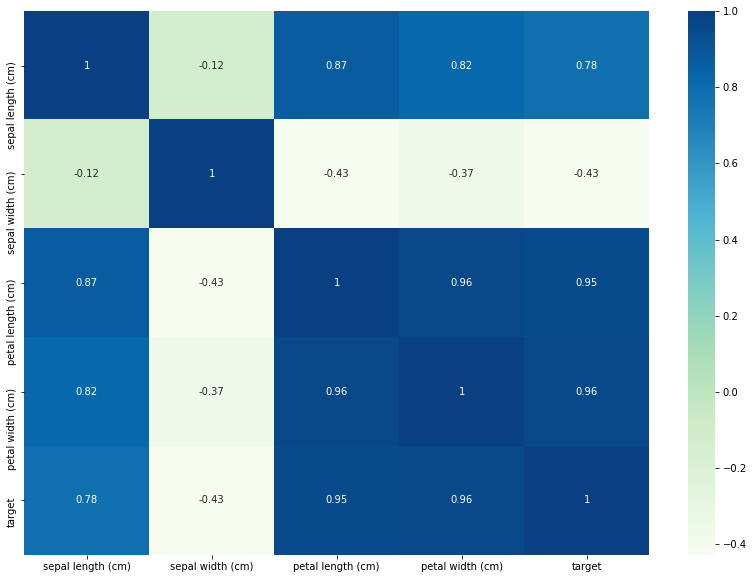

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(14,10))
sns.heatmap(df1.astype("float").corr(),cmap="GnBu",annot=True)

In [5]:
print(list(df1.keys()))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1.drop(["target"],axis=1),df1["target"],test_size=0.1)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

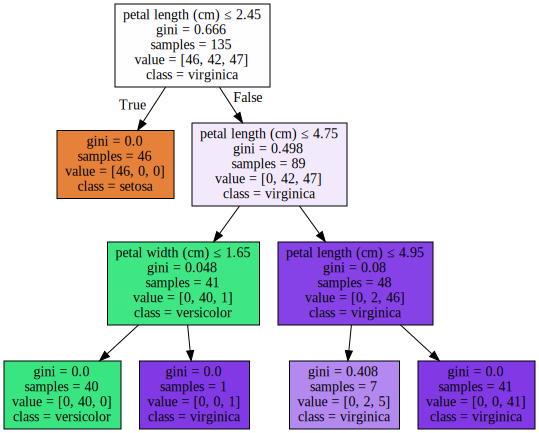

In [6]:
from sklearn.tree import export_graphviz
g = export_graphviz(clf,out_file=None,feature_names=iris["feature_names"],class_names=iris["target_names"],filled=True,special_characters=True)

import graphviz
graph = graphviz.Source(g)
graph

In [7]:
pre = clf.predict(x_test)

print("預測結果",list(pre))
print("正確結果",list(y_test))


預測結果 [2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1]
正確結果 [2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1]


In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pre,y_test))

0.7333333333333333


In [9]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2
0,4,0,0
1,0,4,4
2,0,0,3
